<a href="https://colab.research.google.com/github/ProGenji101/Public-MSc-Data-Science-Project/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup


In [ ]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')


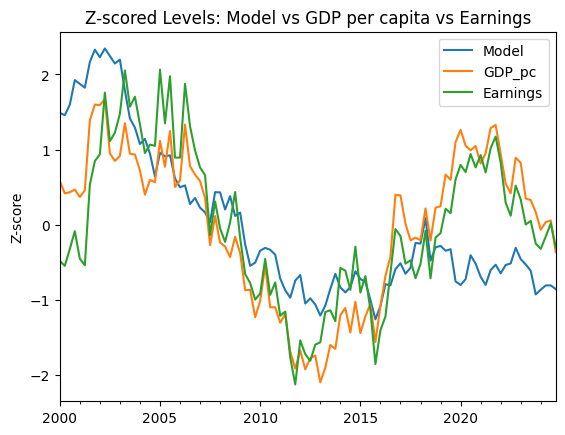

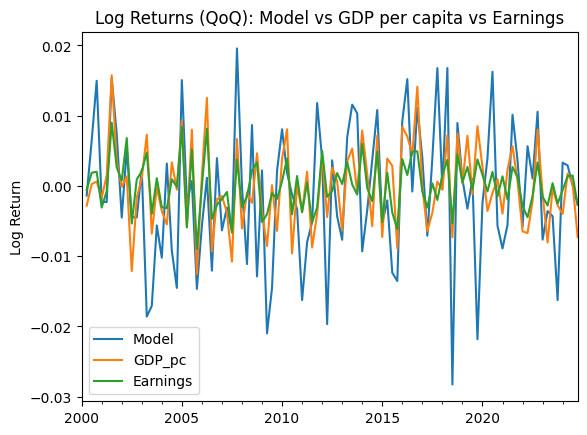

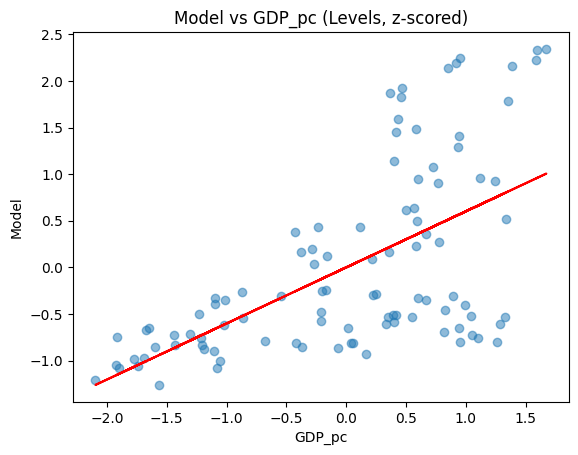

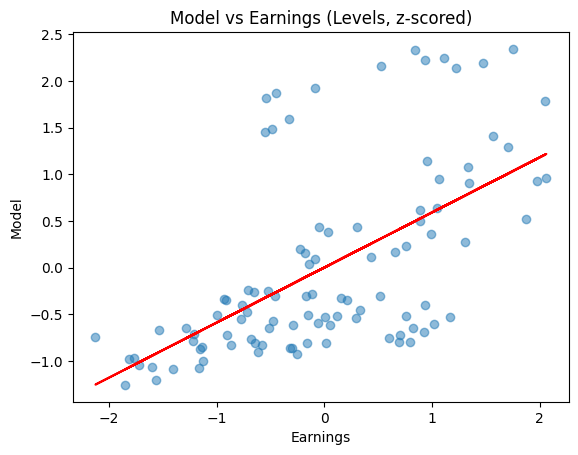

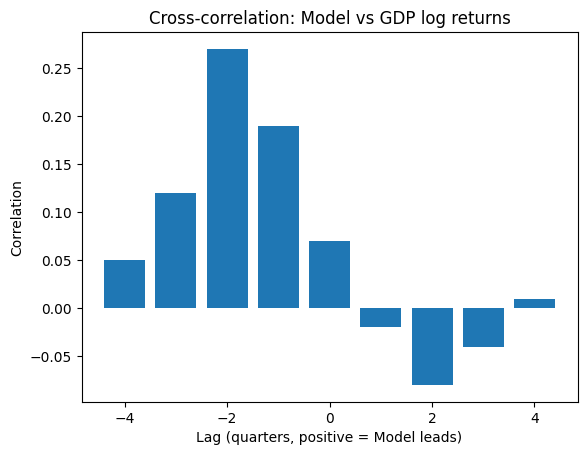

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create fake quarterly index
dates = pd.date_range("2000-01-01", periods=100, freq="Q")

# Fake series
np.random.seed(42)
model = np.cumsum(np.random.randn(100)) + 100
gdp = model*0.6 + np.cumsum(np.random.randn(100)) + 120
earnings = gdp*0.9 + np.cumsum(np.random.randn(100))*0.5 + 150

df = pd.DataFrame({"Model":model, "GDP_pc":gdp, "Earnings":earnings}, index=dates)

# Standardize
df_z = (df - df.mean())/df.std()

# Log returns
df_ret = np.log(df).diff()

# ---- VISUAL 1: Levels ----
df_z.plot(title="Z-scored Levels: Model vs GDP per capita vs Earnings")
plt.ylabel("Z-score")
plt.show()

# ---- VISUAL 2: Log Returns ----
df_ret.plot(title="Log Returns (QoQ): Model vs GDP per capita vs Earnings")
plt.ylabel("Log Return")
plt.show()

# ---- VISUAL 3: Scatter with best fit line ----
for target in ["GDP_pc","Earnings"]:
    plt.scatter(df_z[target], df_z["Model"], alpha=0.5)
    m,b = np.polyfit(df_z[target], df_z["Model"], 1)
    plt.plot(df_z[target], m*df_z[target]+b, color="red")
    plt.title(f"Model vs {target} (Levels, z-scored)")
    plt.xlabel(target); plt.ylabel("Model")
    plt.show()

# ---- VISUAL 4: Cross-Correlation (fake values) ----
lags = np.arange(-4,5)
corrs = [0.05,0.12,0.27,0.19,0.07,-0.02,-0.08,-0.04,0.01]  # fake pattern
plt.bar(lags, corrs)
plt.title("Cross-correlation: Model vs GDP log returns")
plt.xlabel("Lag (quarters, positive = Model leads)")
plt.ylabel("Correlation")
plt.show()

# FTSE All shares 1970- Present


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/Diss Data/FTSE All-Share Historical Data.csv"
df = pd.read_csv(file_path, parse_dates=['Date'], index_col='Date')
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2025-08-01,"4,976.26","4,957.18","4,977.94","4,898.20",339.40M,0.38%
2025-07-01,"4,957.18","4,772.50","4,985.74","4,754.97",2.57B,3.86%
2025-06-01,"4,772.78","4,759.54","4,830.56","4,737.49",2.66B,0.28%
2025-05-01,"4,759.54","4,594.05","4,782.24","4,582.70",2.76B,3.60%
2025-04-01,"4,594.05","4,623.62","4,669.66","4,074.68",3.22B,-0.64%


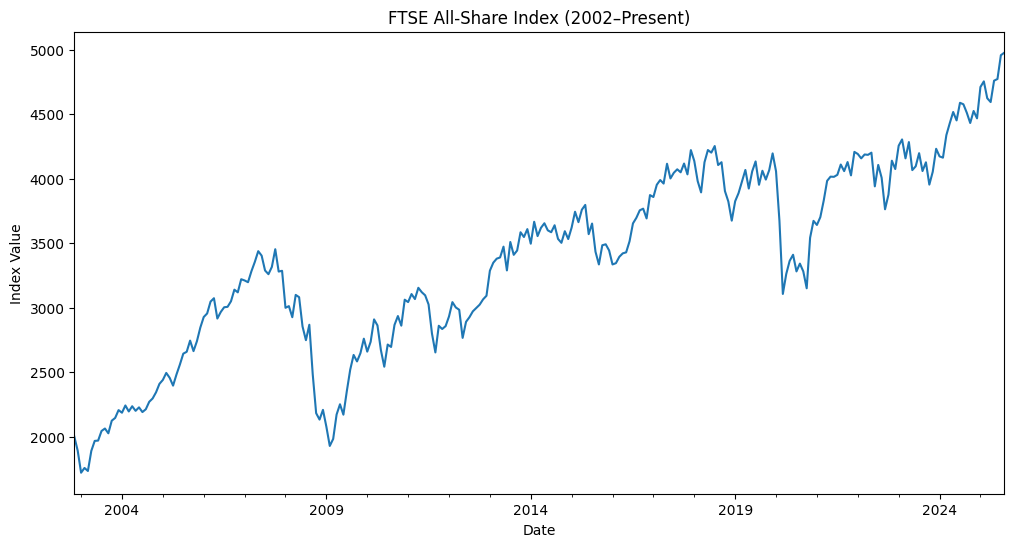

In [ ]:
# Remove commas and convert Price column to float
df['Price'] = df['Price'].str.replace(',', '').astype(float)

# Plot the index value
df['Price'].plot(title='FTSE All-Share Index (2002–Present)', figsize=(12,6))
plt.ylabel("Index Value")
plt.show()

# Calculate log returns
df['LogReturn'] = np.log(df['Price']).diff()

# GDP Per capita as alternative earnings

In [ ]:
file_path = "/content/drive/MyDrive/Diss Data/UK GDP Per Capita.csv"
df = pd.read_csv(file_path)

In [ ]:
# --- Adjust column names here ---
# For example, suppose columns are: "Date", "GDP_per_capita"
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Ensure numeric type (remove commas etc. if necessary)
df['GDP_per_capita'] = df['GDP_per_capita'].astype(str).str.replace(',', '').astype(float)

# Plot GDP per capita
df['GDP_per_capita'].plot(title='UK GDP per Capita (1970–Present)', figsize=(12,6))
plt.ylabel("GDP per capita (£)")
plt.show()

# Calculate log returns (quarter-on-quarter growth rate)
df['LogReturn'] = np.log(df['GDP_per_capita']).diff()

# Plot log returns
df['LogReturn'].plot(title='UK GDP per Capita - Log Returns', figsize=(12,6))
plt.ylabel("Log Return")
plt.show()

# Preview final dataframe
print(df.head())

KeyError: 'Date'

# Bornholdt simulation for demonstration


In [ ]:
# Look at just the header to get all column names
all_cols = pd.read_csv(CSV_PATH, nrows=0).columns.tolist()
len(all_cols), all_cols[:15]  # preview

In [ ]:
def find_cols(cols, regex_list):
    patt = re.compile("|".join(regex_list), flags=re.IGNORECASE)
    return [c for c in cols if patt.search(c)]

educ_cols  = find_cols(all_cols, [r"educ", r"qual", r"degree", r"\bdeg\b", r"gcse", r"a-?level", r"nvq", r"numdeg", r"highest.*qual"])
child_ses  = find_cols(all_cols, [r"\bns-?_?sec\b", r"\bseg\b", r"\brgsc\b", r"\bsc\b", r"\bsoc\d*\b", r"empstat", r"class"])
parent_ses = [c for c in all_cols
              if re.search(r"(fath|father|moth|mother|parent)", c, re.I)
              and re.search(r"(ns-?_?sec|seg|rgsc|sc|soc|class|empstat|occ)", c, re.I)]
demo_cols  = find_cols(all_cols, [r"\bage\b", r"\bsex\b|\bgender\b", r"region|area|county", r"ethnic", r"\bcob\b"])
id_cols    = find_cols(all_cols, [r"\bbcsid\b|\bid\b|\bpid\b|\bcase\b"])

educ_cols[:10], child_ses[:10], parent_ses[:10], demo_cols[:10], id_cols[:10]

In [ ]:
selected_cols = []
for bucket in (id_cols, educ_cols, child_ses, parent_ses, demo_cols):
    for c in bucket:
        if c not in selected_cols:
            selected_cols.append(c)

# Fallback if nothing matched; cap for safety
if not selected_cols:
    selected_cols = all_cols[:25]
selected_cols = selected_cols[:40]

selected_cols

In [ ]:
def to_num(s):
    return pd.to_numeric(s.astype(str).str.replace(",", ""), errors="coerce")

# Child SES: prefer NS-SEC, then SEG, RGSC, SC, SOC, EMPSTAT/CLASS
child_ses_var = next((c for c in df.columns if re.search(r"\bns-?_?sec\b", c, re.I)), None)
if not child_ses_var:
    for key in [r"\bseg\b", r"\brgsc\b", r"\bsc\b", r"\bsoc\d*\b", r"empstat", r"class"]:
        child_ses_var = next((c for c in df.columns if re.search(key, c, re.I)), child_ses_var)
        if child_ses_var: break

# Parental SES: must mention parent + SES/occ/class hint
parent_ses_var = next((c for c in df.columns if re.search(r"(fath|father|moth|mother|parent).*?(ns-?_?sec|seg|rgsc|sc|soc|class|empstat|occ)", c, re.I)), None)

# Degree / highest qualification
degree_var = next((c for c in df.columns if re.search(r"(numdeg|degree|\bdeg\b|highest.*qual|hi.*qual)", c, re.I)), None)

child_ses_var, parent_ses_var, degree_var

In [ ]:
# Degree indicator
df["_has_degree"] = np.nan
if degree_var:
    if re.search(r"numdeg", degree_var, re.I):
        df["_has_degree"] = (to_num(df[degree_var]).fillna(0) > 0).astype(int)
    else:
        vals = to_num(df[degree_var])
        if vals.notna().sum() > 0:
            thr = np.nanpercentile(vals, 75)
            df["_has_degree"] = (vals >= thr).astype(int)

# Binary SES coding (1=high, 0=low) using common class grouping (codes 1–2 high)
df["_child_ses_bin"] = np.nan
if child_ses_var:
    x = to_num(df[child_ses_var])
    df["_child_ses_bin"] = np.where(x.isna(), np.nan, np.where(x <= 2, 1, 0))

df["_parent_ses_bin"] = np.nan
if parent_ses_var:
    x = to_num(df[parent_ses_var])
    df["_parent_ses_bin"] = np.where(x.isna(), np.nan, np.where(x <= 2, 1, 0))

df[["_has_degree", "_child_ses_bin", "_parent_ses_bin"]].head(10)

In [ ]:
# Missingness
missingness = df.isna().mean().sort_values(ascending=False).to_frame("missing_pct")
missingness.head(20)

In [ ]:
# Categorical-like summaries (<= 20 unique values)
for c in df.columns:
    nunique = df[c].nunique(dropna=True)
    if 0 < nunique <= 20:
        print(f"\n=== {c} ===")
        print(df[c].value_counts(dropna=False).head(10))

In [ ]:
# Numeric describe
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
df[num_cols].describe().transpose() if num_cols else "No numeric columns detected."

In [ ]:
def safe_crosstab(a, b):
    ct = pd.crosstab(a, b)
    return ct.div(ct.sum(axis=1), axis=0).fillna(0)

if child_ses_var and parent_ses_var:
    mob_overall = safe_crosstab(df["_parent_ses_bin"], df["_child_ses_bin"])
    print("Mobility table (overall, row-normalized):")
    display(mob_overall)

    if df["_has_degree"].notna().any():
        mob_no_deg = safe_crosstab(df.loc[df["_has_degree"]==0, "_parent_ses_bin"],
                                   df.loc[df["_has_degree"]==0, "_child_ses_bin"])
        mob_deg    = safe_crosstab(df.loc[df["_has_degree"]==1, "_parent_ses_bin"],
                                   df.loc[df["_has_degree"]==1, "_child_ses_bin"])

        print("\nMobility table (No degree):")
        display(mob_no_deg)
        print("\nMobility table (Degree):")
        display(mob_deg)
else:
    print("Could not identify both parent and child SES variables. Check variable names.")

In [ ]:
extract_cols = []
for c in [*id_cols, degree_var, child_ses_var, parent_ses_var, "_has_degree", "_child_ses_bin", "_parent_ses_bin"]:
    if c and c in df.columns and c not in extract_cols:
        extract_cols.append(c)

spin_ready = df[extract_cols].copy()
spin_ready_path = "/content/bcs70_spin_ready_extract.csv"
spin_ready.to_csv(spin_ready_path, index=False)
print(f"Saved spin-ready extract to: {spin_ready_path}")
print("Columns in extract:", extract_cols)

# Downloading Data


In [ ]:
file_path = "/content/drive/MyDrive/Diss Data/bcs70_data.csv"

In [ ]:
# --- Step 1: Discover columns without loading full file ---
all_cols = pd.read_csv(file_path, nrows=0).columns.tolist()

def find_cols(cols, regex_list):
    patt = re.compile("|".join(regex_list), flags=re.IGNORECASE)
    return [c for c in cols if patt.search(c)]

# Candidates by theme (broad patterns; adjust if you know exact names)
educ_cols  = find_cols(all_cols, [r"educ", r"qual", r"degree", r"\bdeg\b", r"gcse", r"a-?level", r"nvq", r"numdeg", r"highest.*qual"])
child_ses  = find_cols(all_cols, [r"\bns-?_?sec\b", r"\bseg\b", r"\brgsc\b", r"\bsc\b", r"\bsoc\d*\b", r"empstat", r"class"])
parent_ses = [c for c in all_cols
              if re.search(r"(fath|father|moth|mother|parent)", c, re.I)
              and re.search(r"(ns-?_?sec|seg|rgsc|sc|soc|class|empstat|occ)", c, re.I)]
demo_cols  = find_cols(all_cols, [r"\bage\b", r"\bsex\b|\bgender\b", r"region|area|county", r"ethnic", r"\bcob\b"])
id_cols    = find_cols(all_cols, [r"\bbcsid\b|\bid\b|\bpid\b|\bcase\b"])

selected_cols = []
for bucket in (id_cols, educ_cols, child_ses, parent_ses, demo_cols):
    for c in bucket:
        if c not in selected_cols:
            selected_cols.append(c)

# Fallback if nothing matched
if not selected_cols:
    selected_cols = all_cols[:25]

# Cap number of columns to stay memory-safe
selected_cols = selected_cols[:40]

# --- Step 2: Chunked read (memory-safe) ---
chunks = []
for chunk in pd.read_csv(CSV_PATH, usecols=selected_cols, chunksize=20000, low_memory=False):
    chunks.append(chunk)
df = pd.concat(chunks, ignore_index=True)
df.columns = [c.strip() for c in df.columns]

# --- Step 3: Helper(s) ---
def to_num(s):
    return pd.to_numeric(s.astype(str).str.replace(",", ""), errors="coerce")

# Pick a child SES variable (priority: NSSEC→SEG→RGSC→SC→SOC)
child_ses_var = next((c for c in df.columns if re.search(r"\bns-?_?sec\b", c, re.I)), None)
if not child_ses_var:
    for key in [r"\bseg\b", r"\brgsc\b", r"\bsc\b", r"\bsoc\d*\b", r"empstat", r"class"]:
        child_ses_var = next((c for c in df.columns if re.search(key, c, re.I)), child_ses_var)
        if child_ses_var: break

# Parental SES variable
parent_ses_var = next((c for c in df.columns if re.search(r"(fath|father|moth|mother|parent).*?(ns-?_?sec|seg|rgsc|sc|soc|class|empstat|occ)", c, re.I)), None)

# Degree variable
degree_var = next((c for c in df.columns if re.search(r"(numdeg|degree|\bdeg\b|highest.*qual|hi.*qual)", c, re.I)), None)

# --- Step 4: Derived indicators (spin states & education) ---
df["_has_degree"] = np.nan
if degree_var:
    if re.search(r"numdeg", degree_var, re.I):
        df["_has_degree"] = (to_num(df[degree_var]).fillna(0) > 0).astype(int)
    else:
        # Generic proxy: top quartile of coded highest-qualification treated as degree+
        vals = to_num(df[degree_var])
        if vals.notna().sum() > 0:
            thr = np.nanpercentile(vals, 75)
            df["_has_degree"] = (vals >= thr).astype(int)

df["_child_ses_bin"] = np.nan
if child_ses_var:
    x = to_num(df[child_ses_var])
    # Common class codings: 1-2 = higher/professional, else lower
    df["_child_ses_bin"] = np.where(x.isna(), np.nan, np.where(x <= 2, 1, 0))

df["_parent_ses_bin"] = np.nan
if parent_ses_var:
    x = to_num(df[parent_ses_var])
    df["_parent_ses_bin"] = np.where(x.isna(), np.nan, np.where(x <= 2, 1, 0))

# --- Step 5: EDA ---

# Missingness (%)
missingness = df.isna().mean().sort_values(ascending=False).to_frame("missing_pct")
print("Missingness (top 20):")
print(missingness.head(20))

# Value counts for categorical-like columns (<= 20 unique values)
print("\nCategorical summaries (top 10 each):")
for c in df.columns:
    nunique = df[c].nunique(dropna=True)
    if 0 < nunique <= 20:
        print(f"\n=== {c} ===")
        print(df[c].value_counts(dropna=False).head(10))

# Numeric describe
num_cols = [c for c in df.columns if pd.api.types.is_numeric_dtype(df[c])]
if num_cols:
    print("\nNumeric describe:")
    print(df[num_cols].describe().transpose())

# --- Step 6: Mobility tables (overall + by degree) ---
def safe_crosstab(a, b):
    ct = pd.crosstab(a, b)
    # Normalize rows if possible
    return ct.div(ct.sum(axis=1), axis=0).fillna(0)

if child_ses_var and parent_ses_var:
    mob_overall = safe_crosstab(df["_parent_ses_bin"], df["_child_ses_bin"])
    print("\nMobility table (overall, row-normalized):")
    print(mob_overall)

    if df["_has_degree"].notna().any():
        mob_no_deg = safe_crosstab(df.loc[df["_has_degree"]==0, "_parent_ses_bin"],
                                   df.loc[df["_has_degree"]==0, "_child_ses_bin"])
        mob_deg    = safe_crosstab(df.loc[df["_has_degree"]==1, "_parent_ses_bin"],
                                   df.loc[df["_has_degree"]==1, "_child_ses_bin"])
        print("\nMobility table (No degree):")
        print(mob_no_deg)
        print("\nMobility table (Degree):")
        print(mob_deg)

# --- Step 7: Save lightweight extract for modeling ---
extract_cols = []
for c in [*id_cols, degree_var, child_ses_var, parent_ses_var, "_has_degree", "_child_ses_bin", "_parent_ses_bin"]:
    if c and c in df.columns and c not in extract_cols:
        extract_cols.append(c)

spin_ready = df[extract_cols].copy()
spin_ready_path = "/content/bcs70_spin_ready_extract.csv"
spin_ready.to_csv(spin_ready_path, index=False)
print(f"\nSaved spin-ready extract to: {spin_ready_path}")
print("Columns in extract:", extract_cols)

NameError: name 're' is not defined

In [ ]:
# =========================
# CONFIG: set your file paths + column names here
# =========================
from google.colab import drive
drive.mount('/content/drive')

# 1) Bornholdt model output (must have columns: Date, ModelValue)
MODEL_CSV = "/content/drive/MyDrive/Diss Data/model_output.csv"
MODEL_DATE_COL = "Date"
MODEL_VALUE_COL = "ModelValue"

# 2) UK GDP per capita (your wide CSV with dates from col 4+ OR a tidy CSV with Date,GDP_per_capita)
GDP_CSV   = "/content/drive/MyDrive/Diss Data/UK GDP Per Capita.csv"
GDP_TIDY  = False   # set True if your GDP file already has columns ['Date','GDP_per_capita']

# 3) Earnings series (ideally quarterly, or monthly that we’ll convert to quarterly)
#    Example: ONS AWE Total Pay (seasonally adjusted) if you’ve exported it to CSV.
EARN_CSV          = "/content/drive/MyDrive/Diss Data/UK_Earnings.csv"
EARN_TIDY         = True    # set True if file has ['Date','Earnings']
EARN_DATE_COL     = "Date"
EARN_VALUE_COL    = "Earnings"  # e.g., AWE index or £ per capita; we’ll just treat as a level series

# =========================
# LIBS
# =========================
import pandas as pd, numpy as np, re, matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

plt.rcParams["figure.figsize"] = (12, 6)

# =========================
# HELPERS
# =========================
def _to_num(s):
    return pd.to_numeric(pd.Series(s).astype(str).str.replace(",", ""), errors="coerce")

def parse_quarter_like(label):
    """Parse labels like 1970Q1, 1970-Q1, Q1 1970, 1970/ Q1, or plain dates."""
    s = str(label).strip()
    dt = pd.to_datetime(s, errors="coerce")
    if pd.notna(dt):
        return dt
    m = re.match(r"^\s*(\d{4})\s*[-\s/]*[Qq]\s*([1-4])\s*$", s)
    if m:
        y, q = int(m.group(1)), int(m.group(2))
        return pd.Period(year=y, quarter=q).end_time
    m = re.match(r"^\s*[Qq]\s*([1-4])\s*[-\s/]*(\d{4})\s*$", s)
    if m:
        q, y = int(m.group(1)), int(m.group(2))
        return pd.Period(year=y, quarter=q).end_time
    return pd.NaT

def load_quarterly_from_wide(csv_path, start_col_idx=3, value_row=0, series_name="Value"):
    """For 'wide' files where dates are column headers from a given index onward and one row contains the values."""
    raw = pd.read_csv(csv_path, header=None)
    date_labels = raw.iloc[0, start_col_idx:].tolist()
    values = _to_num(raw.iloc[value_row, start_col_idx:].tolist()).values
    dates = pd.to_datetime([parse_quarter_like(x) for x in date_labels])
    ts = pd.DataFrame({"Date": dates, series_name: values}).dropna(subset=["Date"]).sort_values("Date").reset_index(drop=True)
    return ts.set_index("Date")

def load_tidy(csv_path, date_col, value_col, freq="Q"):
    """Load tidy file with Date + Value columns, coerce to datetime, and (if not quarterly) resample to quarter-end."""
    df = pd.read_csv(csv_path)
    df[date_col] = pd.to_datetime(df[date_col])
    df[value_col] = _to_num(df[value_col])
    df = df.dropna(subset=[date_col, value_col]).sort_values(date_col)
    df = df.set_index(date_col)
    if freq == "Q":
        # If already quarterly this is harmless; if monthly, we take last obs in quarter
        df = df.resample("Q").last()
    return df.rename(columns={value_col: "Value"})

def zscore(x):
    return (x - np.nanmean(x)) / np.nanstd(x)

def crosscorr(a, b, max_lag=8):
    """Compute cross-correlation at lags -max_lag..+max_lag (b shifted vs a). Return DataFrame."""
    out = []
    for lag in range(-max_lag, max_lag+1):
        if lag < 0:
            c = a.shift(-lag).corr(b)   # b leads
        else:
            c = a.corr(b.shift(lag))    # a leads
        out.append({"lag": lag, "corr": c})
    return pd.DataFrame(out)

# =========================
# LOAD SERIES
# =========================
# Model (assumed tidy)
model = pd.read_csv(MODEL_CSV)
model[MODEL_DATE_COL] = pd.to_datetime(model[MODEL_DATE_COL])
model = model[[MODEL_DATE_COL, MODEL_VALUE_COL]].dropna().sort_values(MODEL_DATE_COL)
model = model.set_index(MODEL_DATE_COL).resample("Q").last()  # ensure quarterly end
model = model.rename(columns={MODEL_VALUE_COL: "Model"})

# GDP per capita
if GDP_TIDY:
    gdp = load_tidy(GDP_CSV, "Date", "GDP_per_capita", freq="Q").rename(columns={"Value":"GDP_pc"})
else:
    # wide: dates in columns from 4th (0-based idx 3) onward, values in first row (row 0)
    gdp = load_quarterly_from_wide(GDP_CSV, start_col_idx=3, value_row=0, series_name="GDP_pc")

# Earnings
if EARN_TIDY:
    earn = load_tidy(EARN_CSV, EARN_DATE_COL, EARN_VALUE_COL, freq="Q").rename(columns={"Value":"Earnings"})
else:
    # if you have a wide format earnings CSV, change start_col_idx and value_row as needed
    earn = load_quarterly_from_wide(EARN_CSV, start_col_idx=3, value_row=0, series_name="Earnings")

# =========================
# ALIGN & PREP RETURNS
# =========================
df = model.join(gdp, how="inner").join(earn, how="inner")

# Levels (z-scored to compare shapes)
df["Model_z"] = zscore(df["Model"])
df["GDP_pc_z"] = zscore(df["GDP_pc"])
df["Earnings_z"] = zscore(df["Earnings"])

# Log growth (QoQ)
for col in ["Model", "GDP_pc", "Earnings"]:
    df[f"{col}_logret"] = np.log(df[col]).diff()

# Drop first NaN from diffs
df = df.dropna()

print("Merged head:")
display(df.head())

# =========================
# CORRELATIONS & SIMPLE OLS
# =========================
print("\nContemporaneous correlations (levels, z-scored):")
print(df[["Model_z","GDP_pc_z","Earnings_z"]].corr())

print("\nContemporaneous correlations (log returns):")
print(df[["Model_logret","GDP_pc_logret","Earnings_logret"]].corr())

# OLS: Model vs GDP per capita (levels and returns)
for y, X in [("Model_z", ["GDP_pc_z","Earnings_z"]),
             ("Model_logret", ["GDP_pc_logret","Earnings_logret"])]:
    yv = df[y].values
    Xv = add_constant(df[X].values)
    model_fit = OLS(yv, Xv, missing="drop").fit()
    print(f"\nOLS: {y} ~ " + " + ".join(X))
    print(model_fit.summary().tables[1])

# =========================
# LEAD/LAG CROSS-CORRELATION
# =========================
lags_gdp = crosscorr(df["Model_logret"], df["GDP_pc_logret"], max_lag=8)
lags_ear = crosscorr(df["Model_logret"], df["Earnings_logret"], max_lag=8)
print("\nCross-corr (Model logret vs GDP_pc logret) lags -8..+8 (positive lag = Model leads):")
display(lags_gdp)
print("\nCross-corr (Model logret vs Earnings logret) lags -8..+8:")
display(lags_ear)

# =========================
# PLOTS
# =========================
# 1) Levels (z-scored) comparison
ax = df[["Model_z","GDP_pc_z","Earnings_z"]].plot(title="Levels (z-scored): Model vs GDP per capita vs Earnings")
ax.set_xlabel("Quarter"); ax.set_ylabel("Z-score"); plt.grid(True); plt.show()

# 2) Log returns comparison
ax = df[["Model_logret","GDP_pc_logret","Earnings_logret"]].plot(title="Log Returns (QoQ): Model vs GDP per capita vs Earnings")
ax.set_xlabel("Quarter"); ax.set_ylabel("Log return"); plt.grid(True); plt.show()

# 3) Scatter with best-fit line (levels)
for target in ["GDP_pc_z","Earnings_z"]:
    x = df[target]; y = df["Model_z"]
    b = np.polyfit(x, y, 1); line = np.poly1d(b)
    plt.scatter(x, y, alpha=0.5)
    plt.plot(np.sort(x), line(np.sort(x)), lw=2)
    plt.title(f"Model (z) vs {target} (z)")
    plt.xlabel(target); plt.ylabel("Model_z"); plt.grid(True); plt.show()

# 4) Scatter with best-fit line (returns)
for target in ["GDP_pc_logret","Earnings_logret"]:
    x = df[target]; y = df["Model_logret"]
    b = np.polyfit(x.dropna(), y.dropna(), 1); line = np.poly1d(b)
    valid = x.notna() & y.notna()
    plt.scatter(x[valid], y[valid], alpha=0.5)
    plt.plot(np.sort(x[valid]), line(np.sort(x[valid])), lw=2)
    plt.title(f"Model logret vs {target}")
    plt.xlabel(target); plt.ylabel("Model_logret"); plt.grid(True); plt.show()